### Extract QS Ranking data using Selenium
- https://www.topuniversities.com/university-rankings/university-subject-rankings/2023/arts-humanities?&tab=indicators
- https://github.com/dupadhyaya/auJupyter/blob/main/UserGK/web_scraping/QS_2023_selenium.ipynb

In [25]:
## Libraries
import pandas as pd
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time
from selenium.webdriver.common.by import By

In [26]:
#chrome driver
driver = webdriver.Chrome('C:\chromeDriver\chromedriver')

In [27]:
#url
url = 'https://www.topuniversities.com/university-rankings/university-subject-rankings/2023/arts-humanities?&tab=indicators'
url

'https://www.topuniversities.com/university-rankings/university-subject-rankings/2023/arts-humanities?&tab=indicators'

In [28]:
driver.maximize_window()
time.sleep(3)

In [29]:
driver.get(url)
time.sleep(5)

In [30]:
print(driver.current_url)

https://www.topuniversities.com/university-rankings/university-subject-rankings/2023/arts-humanities?&tab=indicators


In [31]:
print(driver.title)

QS World University Rankings for Arts and Humanities 2023 | Top Universities


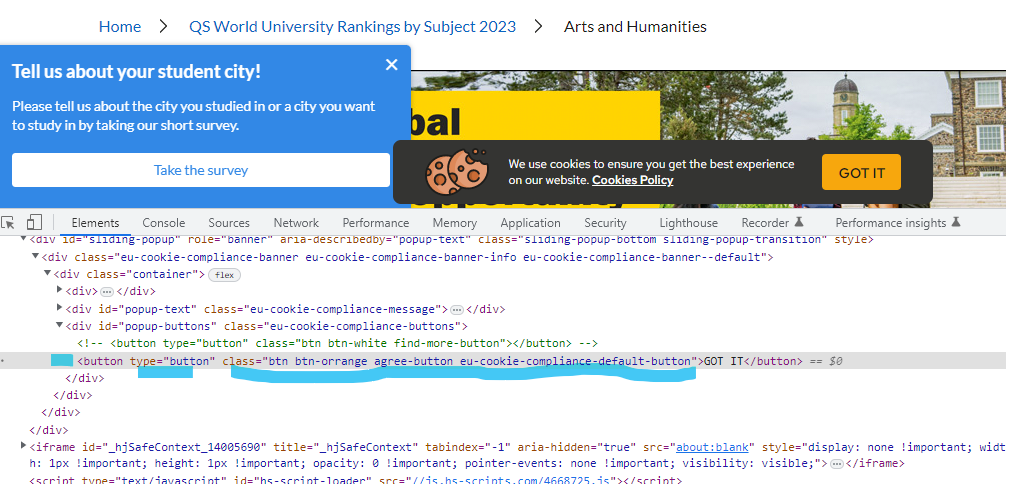

In [32]:
# This is for cookies
cookie=driver.find_element(by=By.XPATH,value='//button[@class="btn btn-orrange agree-button eu-cookie-compliance-default-button"]')
cookie.click()  
time.sleep(3)

In [33]:
#max expected pages = 60
#521/15
page=60

In [34]:
#blank list of items
rank=[]
university=[]
overall=[]
academic=[]
employer=[]
citation=[]
hindex=[]
international=[]

In [35]:
#now loop through the pages using element tags

In [36]:
j=0
try:
    for i in range(page+1):
        table = driver.find_elements(by=By.XPATH, value='//div/a[@class="uni-link"]')  #univ
        table1 = driver.find_elements(by=By.XPATH,value='//div[@class="_univ-rank "]') #rank
        table2 = driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind overall"]/span/div/div[@class="td-wrap-in"]')   #overall
        table3 = driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind ind_76"]/span/div/div[@class="td-wrap-in"]')  #areputation
        table4 = driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind ind_77"]/span/div/div[@class="td-wrap-in"]') #ereputation
        table5 = driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind ind_70"]/span/div/div[@class="td-wrap-in"]') #citations
        
        for row in table:
            if row.text in university:
                continue
            else:    
                university.append(row.text)
                rank.append(table1[j].text)
                overall.append(table2[j].text)
                academic.append(table3[j].text)
                employer.append(table4[j].text)
                citation.append(table5[j].text)                      
                                                               
            j=j+1                                                                                        
        load_more=driver.find_element(by=By.XPATH,value='//div/button[@class="btn btn-primary loadmorebutton loadmorebutton_css mt-2"]')
        
        load_more.click()  
        time.sleep(9)  
       
except(NoSuchElementException) as e:
    print("We have scarpped all pages successfully")   

We have scarpped all pages successfully


In [37]:
len(university)

521

In [38]:
df = pd.DataFrame({'Rank':rank,'University':university,'Overall':overall,'Academic':academic,'Employer':employer,'Citation':citation})
df.shape

(521, 6)

In [39]:
df.head(2)

,Rank,University,Overall,Academic,Employer,Citation
0,1,Harvard University,98.2,100,100,82.5
1,2,University of Cambridge,96.9,99.2,95,81.4


In [40]:
#other columns
from selenium.webdriver.common.keys import Keys

In [41]:
driver.find_element(By.XPATH, '//body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(3)

In [42]:
hidden_right=driver.find_element(by=By.XPATH, value='//i[@class="fal fa-chevron-right"]')

In [43]:
hidden_right.click()  
time.sleep(4)

In [44]:
hidden_right.click()  
time.sleep(4)

In [45]:
table6= driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind ind_69"]/span/div/div[@class="td-wrap-in"]')
table7= driver.find_elements(by=By.XPATH, value='//div[@class="overall-score-span-ind ind_15"]/span/div/div[@class="td-wrap-in"]')

In [46]:
j=0

In [47]:
for row in table:
    if row.text in university:
        hindex.append(table6[j].text)
        j=j+1
    else:
        continue

In [48]:
j=0

In [49]:
for row in table:
    if row.text in university:
        international.append(table7[j].text)
        j=j+1
    else:
        continue

In [50]:
df['hindex']=hindex

In [51]:
df['international']=international

In [52]:
df.shape

(521, 8)

In [53]:
df

,Rank,University,Overall,Academic,Employer,Citation,hindex,international
0,1,Harvard University,98.2,100,100,82.5,93.5,100
1,2,University of Cambridge,96.9,99.2,95,81.4,98.5,98.2
2,3,University of Oxford,96.8,99.4,96,79.4,100,90.9
3,4,Stanford University,91.6,93.7,93,94.1,83,69.1
4,5,"University of California, Berkeley (UCB)",91.5,95.4,87.5,87.3,91.7,66.4
...,...,...,...,...,...,...,...,...
516,501-520,University of South Florida,-,52.2,57.8,76.7,63,26.1
517,501-520,University of Strathclyde,-,54.3,54.8,78.2,58,21.3
518,501-520,University of the West of England,-,53.8,56.1,78.9,58,16.1
519,501-520,Universität Stuttgart,-,59.1,47.7,72.3,35.5,28.4


In [55]:
df.to_csv('E:/analytics/data/qssubject.csv', index=False, header=True, na_rep='')

In [56]:
time.sleep(5)
driver.quit() #close the browser